In [157]:
# importing libraries
import pandas as pd
#import numpy as np                     # For mathematical calculations
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")


In [158]:
#reading data
train_data=pd.read_csv('C:/Users/Seema/Desktop/Data Science Practice/Titanic/Train.csv')
test_data=pd.read_csv('C:/Users/Seema/Desktop/Data Science Practice/Titanic/Test.csv')

In [159]:
#to know null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [160]:
#column names to drop 
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [161]:
#drop columns
train_data.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [162]:
#fill in null value with mean
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [163]:
#replace Male with 0 and Female with 1
train_data['Sex'].replace('male', 0,inplace=True)
train_data['Sex'].replace('female', 1,inplace=True)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


Text(0, 0.5, 'Percentage')

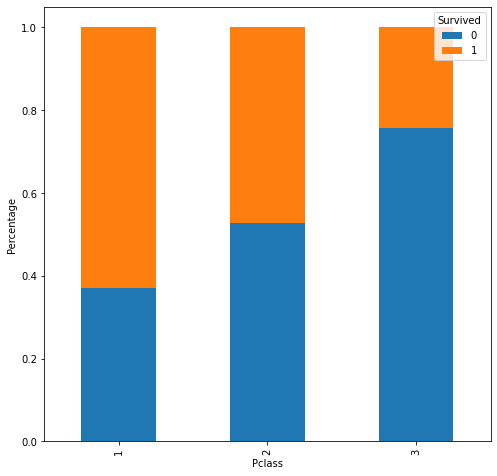

In [164]:
#relation between Pclass and Survived
print(pd.crosstab(train_data['Pclass'],train_data['Survived']))

job=pd.crosstab(train_data['Pclass'],train_data['Survived'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Pclass')
plt.ylabel('Percentage')

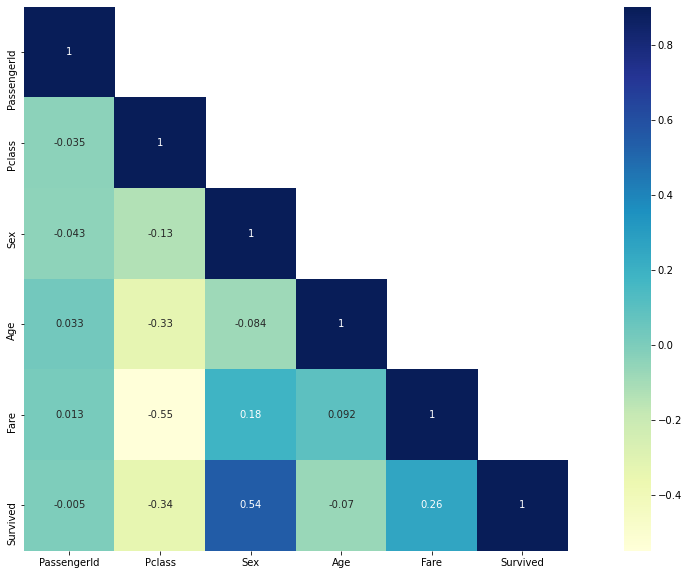

In [165]:
#finding corelation
corr = train_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Model Building

In [166]:
target = train_data['Survived']
train_data = train_data.drop('Survived',1)



In [167]:
# splitting into train and validation with 40% data in validation set and 60% data in train set.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, target, test_size = 0.33)

In [168]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [169]:
test_data.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [170]:
#fill in missing values as mean of Age and Fare respectively
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [171]:
#Replace Male as 0 and Female as 1
test_data['Sex'].replace('male', 0,inplace=True)
test_data['Sex'].replace('female', 1,inplace=True)

In [172]:
# defining the logistic regression model
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()

In [173]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [174]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

In [175]:
# calculating the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_val, prediction)

0.7796610169491526

In [200]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [201]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [202]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [203]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.8067796610169492

In [204]:
test_prediction = clf.predict(test_data)

In [205]:
submission = pd.DataFrame()

In [206]:
# creating a Business_Sourced column and saving the predictions in it
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = test_prediction

In [207]:
submission.to_csv('submission.csv', header=True, index=False)